In [1]:
%run PlottingSetup.ipynb
%matplotlib inline

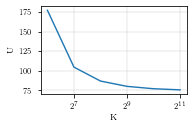

In [2]:
fig,ax=plt.subplots()
R_peak=9.3
K=2**np.arange(0,12);
def B_func(k):
    B=8*k*R_peak/(k-4*R_peak)
    B[B<0]=np.nan
    return B
ax.plot(K,B_func(K))
ax.set_xscale('log',basex=2)
ax.set_ylabel('U')
ax.set_xlabel('K')
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(wspace = 0,hspace=0,left=0.2,bottom=0.25)
save('MMBS')


Host performance 0.4686375802444582
Dev performance 3.9198260224312933
Dev Latenz 1.28746e-05


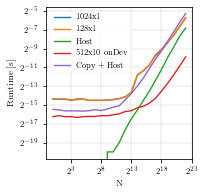

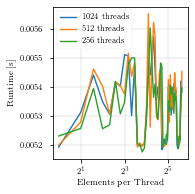

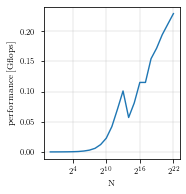

In [146]:
filename='comb_pointwise.txt'
# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='copying.txt'
# import data
c_data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
len_data=data[(data[:,1]==1) & (data[:,2]==1024)]
ax.plot(len_data[:,0],len_data[:,3],label='1024x1')
len_data=data[(data[:,1]==1) & (data[:,2]==128)]
ax.plot(len_data[:,0],len_data[:,3],label='128x1')
ax.plot(len_data[:,0],len_data[:,4],label='Host')
ax.plot(len_data[:,0],len_data[:,5],label='512x10 onDev')
ax.plot(len_data[:,0],1*c_data[:,1]+2*c_data[:,2]+len_data[:,4],label='Copy + Host')

print('Host performance',len_data[-1,0]/len_data[-1,4]/1e9)
print('Dev performance',len_data[-1,0]/len_data[-1,5]/1e9)

print('Dev Latenz',len_data[0,5])

ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.2,bottom=.15)
save('PointwiseTHBdependence')


fig, ax = plt.subplots()

# plot functions, time
len_data=data[(data[:,0]==2**20) & (data[:,2]==1024)]
ax.plot(len_data[:,1],len_data[:,3],label='1024 threads')
len_data=data[(data[:,0]==2**20) & (data[:,2]==512)]
ax.plot(len_data[:,1],len_data[:,3],label='512 threads')
len_data=data[(data[:,0]==2**20) & (data[:,2]==256)]
ax.plot(len_data[:,1],len_data[:,3],label='256 threads')


ax.set_ylabel('Runtime [s]')
# ax.set_yscale('log',basey=2)
ax.set_xlabel('Elements per Thread')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.25,bottom=.15)
save('PointwiseEPTHdependence')


# # plot functions, performance
fig, ax = plt.subplots()
len_data=data[(data[:,1]==2**5) & (data[:,2]==1024)]

ax.plot(len_data[:,0],len_data[:,0]/len_data[:,3]/1e9)

ax.set_ylabel('performance [Gflops]')
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.25,bottom=.15)
save('PointwisePerf')



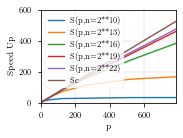

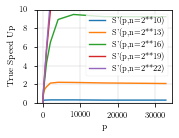

In [136]:
data = np.genfromtxt('comb_pointwise_analysis.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

def linear_func(x,a,b):
    return a*x+b


fig, ax = plt.subplots()
speedups=[]
for length in np.unique(data[:,0]):
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,2],len_data[:,3]/len_data[:,5],label="S(p,n=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,3]/len_data[:,5]]

speedups_array=np.array(speedups)
until=len(len_data[len_data[:,2]<10**2])
su_popt, su_pcov = curve_fit(linear_func, len_data[:until,2], speedups_array.max(axis=0)[:until])
    
ax.plot(len_data[:,2],linear_func(len_data[:,2],*su_popt),label='Sc')

ax.set_xlim(0,786)
ax.set_ylim(0,600)


ax.set_ylabel('Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='upper left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('CombPointwiseSpeedUp')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(data[:,0]):
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,2],len_data[:,4]/len_data[:,5],label="S'(p,n=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,4]/len_data[:,5]]

# ax.set_xlim(0,786)
ax.set_ylim(0,10)


ax.set_ylabel('True Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend()

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('CombPointwiseTrueSpeedUp')

/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


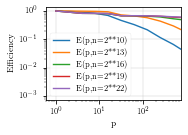

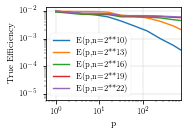

In [95]:
fig, ax = plt.subplots()

for length in np.unique(data[:,0]):
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,2],len_data[:,3]/len_data[:,5]/len_data[:,2],label="E(p,n=2**"+str(int(np.log2(length)))+")")
    
ax.set_ylabel('Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend()
ax.set_xlim(0,786)

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('CombPointwiseEfficiencies')


fig, ax = plt.subplots()

for length in np.unique(data[:,0]):
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,2],len_data[:,4]/len_data[:,5]/len_data[:,2],label="E(p,n=2**"+str(int(np.log2(length)))+")")
    

ax.set_ylabel('True Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend()
ax.set_xlim(0,786)

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('CombPointwiseTrueEfficiencies')

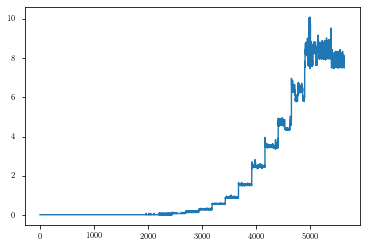

In [6]:
len_data=data[(data[:,1]==1) & (data[:,2]==1024)]
true_speed_up_cpw=data[:,4]/data[:,5]
plt.plot(true_speed_up_cpw)

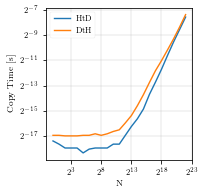

In [10]:
filename='copying.txt'
# import data
c_data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)


fig, ax = plt.subplots()

# plot functions, time
ax.plot(c_data[:,0],c_data[:,1],label='HtD')
ax.plot(c_data[:,0],c_data[:,2],label='DtH')



ax.set_ylabel('Copy Time [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.2,bottom=.15)
save('CopyTime')

Host 0.6649098719277294
Device 5.792619902960624
Dev Latenz 1.311302e-05


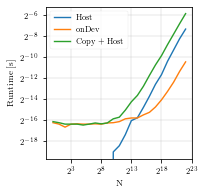

In [145]:
filename='pointwise.txt'
# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='copying.txt'
# import data
c_data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data[:,0],data[:,2],label='Host')
ax.plot(data[:,0],data[:,1],label='onDev')
ax.plot(data[:,0],1*c_data[:,1]+1*c_data[:,2]+data[:,2],label='Copy + Host')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('N')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/2)
plt.subplots_adjust(left=.2,bottom=.15)
save('PointwiseHvD')

print('Host',data[-1,0]/data[-1,2]/1e9)
print('Device',data[-1,0]/data[-1,1]/1e9)
print('Dev Latenz',data[0,1])


[1410.71635393 2565.49968621]
[10.90909178 20.89918789]


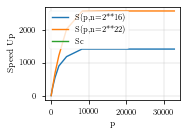

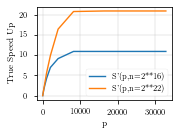

In [127]:
data = np.genfromtxt('pointwise_analysis.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

def linear_func(x,a,b):
    return a*x+b


fig, ax = plt.subplots()
speedups=[]
for length in np.unique(data[:,0])[[16,22]]:
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,1],len_data[:,2]/len_data[:,4],label="S(p,n=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,2]/len_data[:,4]]

speedups_array=np.array(speedups)
until=len(len_data[len_data[:,2]<10**2])
su_popt, su_pcov = curve_fit(linear_func, len_data[:until,2], speedups_array.max(axis=0)[:until])
    
ax.plot(len_data[:,2],linear_func(len_data[:,2],*su_popt),label='Sc')

# ax.set_xlim(0,400)
# ax.set_ylim(0,600)


ax.set_ylabel('Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='upper left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('PointwiseSpeedUp')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(data[:,0])[[16,22]]:
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,1],len_data[:,3]/len_data[:,4],label="S'(p,n=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,3]/len_data[:,4]]

# ax.set_xlim(0,786)
# ax.set_ylim(0,6)


ax.set_ylabel('True Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend()

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('PointwiseTrueSpeedUp')
print(np.array(speedups)[:,-1])
print(np.array(true_speedups)[:,-1])